In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 


## Trafikkdata

Begynner med å lese inn all informasjonen fra `trafikkdata.csv` og legger det inn i en tabell slik at det er letter å lese

In [21]:
# Leser inn trafikkdata
trafikk_df = pd.read_csv('trafikkdata.csv', sep=';', low_memory=False)
trafikk_df

,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,"Dekningsgrad (%)|Antall timer total|Antall timer inkludert|Antall timer ugyldig|Ikke gyldig lengde|Lengdekvalitetsgrad (%)|< 5,6m|>= 5,6m|5,6m - 7,6m|7,6m - 12,5m|12,5m - 16,0m|>= 16,0m|16,0m - 24,0m|>= 24,0m"
0,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,1,-,"0,0|1|1|1|-|-|-|-|-|-|-|-|-|-"
1,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,2,-,"0,0|1|1|1|-|-|-|-|-|-|-|-|-|-"
2,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt i retning Danmarksplass,-,"0,0|1|1|1|-|-|-|-|-|-|-|-|-|-"
3,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt i retning Florida,-,"0,0|1|1|1|-|-|-|-|-|-|-|-|-|-"
4,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt,-,"0,0|1|1|1|-|-|-|-|-|-|-|-|-|-"
...,...,...,...,...,...,...,...,...,...,...,...
348635,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,1,NaN,|||||||||||||
348636,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,2,NaN,|||||||||||||
348637,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,Totalt i retning Danmarksplass,NaN,|||||||||||||
348638,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,Totalt i retning Florida,NaN,|||||||||||||


Her kan man se at `Trafikkregistreringspunkt`, `Navn` og `Vegreferanse` ikke har noen unike verdier. Fjerner dermed disse kolonnene. 

In [22]:
# Finn unike verdier i kolonnene for å se om det er noen duplikater
trafikkregistreringer = trafikk_df["Trafikkregistreringspunkt"].unique()
navn = trafikk_df["Navn"].unique()
vegreferanse = trafikk_df["Vegreferanse"].unique()

print(f"Trafikkregistreringer: {trafikkregistreringer}\nNavn: {navn}\nVegreferanse: {vegreferanse}")

# Fjerner kolonner som ikke er nødvendige
trafikk_df.drop(["Trafikkregistreringspunkt", "Navn", "Vegreferanse"], axis=1, inplace=True)

Trafikkregistreringer: ['17510B2483952']
Navn: ['Gamle Nygårdsbru sykkel']
Vegreferanse: ['KV256 S2D1 m75']


Fjerner rader som ikke er nødvendige. Deretter fjerner jeg kolonnene `Fra`, `Til`, `Felt` og den siste kolonnen som inneholder bland annet dekningsgrad. 

In [23]:

# Fjerner rader som ikke er nødvendige
trafikk_df = trafikk_df[trafikk_df['Felt'] == 'Totalt']

# Fjerner kolonner som ikke er nødvendige
trafikk_df.drop(["Fra", "Til", "Felt", trafikk_df.columns[-1]], axis=1, inplace=True)

trafikk_df

/var/folders/jd/9_rdysys3xx4h_g_5x5znvmc0000gn/T/ipykernel_18283/1947036268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafikk_df.drop(["Fra", "Til", "Felt", trafikk_df.columns[-1]], axis=1, inplace=True)


,Dato,Fra tidspunkt,Til tidspunkt,Trafikkmengde
4,2015-07-16,15:00,16:00,-
9,2015-07-16,16:00,17:00,101
14,2015-07-16,17:00,18:00,79
19,2015-07-16,18:00,19:00,56
24,2015-07-16,19:00,20:00,45
...,...,...,...,...
348619,2023-07-01,19:00,20:00,NaN
348624,2023-07-01,20:00,21:00,NaN
348629,2023-07-01,21:00,22:00,NaN
348634,2023-07-01,22:00,23:00,NaN


## Vær data

Leser inn informasjonen om været fra 2015-2023 og legger dette inn i en tabell.

In [24]:
# Leser inn alle vær dataene 
florida2015_df = pd.read_csv('Florida_2015-01-01_2016-01-01_1654174882.csv', sep=',')
florida2016_df = pd.read_csv('Florida_2016-01-01_2017-01-01_1654174902.csv', sep=',')
florida2017_df = pd.read_csv('Florida_2017-01-01_2018-01-01_1654174925.csv', sep=',')
florida2018_df = pd.read_csv('Florida_2018-01-01_2019-01-01_1654175073.csv', sep=',')
florida2019_df = pd.read_csv('Florida_2019-01-01_2020-01-01_1654174955.csv', sep=',')
florida2020_df = pd.read_csv('Florida_2020-01-01_2021-01-01_1654174973.csv', sep=',')
florida2021_df = pd.read_csv('Florida_2021-01-01_2022-01-01_1654174989.csv', sep=',')
florida2022_df = pd.read_csv('Florida_2022-01-01_2023-01-01_1688719054.csv', sep=',')
florida2023_df = pd.read_csv('Florida_2023-01-01_2023-07-01_1688719120.csv', sep=',')

# Setter alle vær dataene i en dataframe
weather_df = pd.concat([florida2015_df, florida2016_df, florida2017_df, florida2018_df, florida2019_df, florida2020_df, florida2021_df, florida2022_df, florida2023_df])

weather_df


,Dato,Tid,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast,Relativ luftfuktighet
0,2015-01-01,00:00,18.1,0.0,6.6,166.0,4.2,1008.6,NaN,NaN
1,2015-01-01,00:10,19.5,0.0,6.6,159.0,4.0,1008.6,NaN,NaN
2,2015-01-01,00:20,20.2,0.0,6.6,154.0,3.1,1008.3,NaN,NaN
3,2015-01-01,00:30,20.2,0.0,6.6,154.0,3.7,1008.3,NaN,NaN
4,2015-01-01,00:40,20.2,0.0,6.7,151.0,2.9,1007.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26052,2023-06-30,23:10,0.7,0.0,13.7,137.0,2.3,995.3,3.6,81.0
26053,2023-06-30,23:20,0.7,0.0,13.6,138.0,1.9,995.3,3.3,82.0
26054,2023-06-30,23:30,0.8,0.0,13.6,146.0,1.7,995.3,3.0,83.0
26055,2023-06-30,23:40,0.8,0.0,13.6,140.0,1.9,995.3,3.3,82.0


## Merger trafikkdataen og vær dataen sammen

Merger sammen datasettene ved på resample vær dataen til hver time og lage en ny kolonne `Datetime`

In [25]:
# Lager en ny kolonne som inneholder dato og tid 
weather_df['Datetime'] = pd.to_datetime(weather_df['Dato'] + ' ' + weather_df['Tid'])
trafikk_df['Datetime'] = pd.to_datetime(trafikk_df['Dato'] + ' ' + trafikk_df['Fra tidspunkt'])

weather_df.set_index('Datetime', inplace=True)

# Resampler vær dataene til å være per time
aggregated_weather_data = weather_df.resample('H').agg({
    'Globalstraling' : 'mean',
    'Solskinstid' : 'sum',
    'Lufttemperatur' : 'mean',
    'Vindretning' : 'mean',
    'Vindstyrke' : 'mean',
    'Lufttrykk' : 'mean',
    'Vindkast' : 'mean',
    'Relativ luftfuktighet' : 'mean'
}).reset_index()

# Merger vær dataene med trafikkdataene
merged_data = aggregated_weather_data.merge(trafikk_df, how='left')


/var/folders/jd/9_rdysys3xx4h_g_5x5znvmc0000gn/T/ipykernel_18283/4242928118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafikk_df['Datetime'] = pd.to_datetime(trafikk_df['Dato'] + ' ' + trafikk_df['Fra tidspunkt'])


Filtrer datasettet slik at det bare inneholder informasjon mellom 2015-07-16 15:00 og 2023-06-30 23:50

In [26]:
# Filtrerer datasettet til å kun inneholde data fra 2015-07-16 15:00 til 2023-06-30 23:00
merged_data = merged_data[(merged_data['Datetime'] >= '2015-07-16 15:00') & (merged_data['Datetime'] <= '2022-12-31 00:00')]
merged_data

,Datetime,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast,Relativ luftfuktighet,Dato,Fra tidspunkt,Til tidspunkt,Trafikkmengde
4719,2015-07-16 15:00:00,504.400000,43.4,13.900000,319.166667,4.083333,1014.433333,6.700000,NaN,2015-07-16,15:00,16:00,-
4720,2015-07-16 16:00:00,432.833333,48.7,13.733333,317.500000,4.333333,1014.400000,7.200000,NaN,2015-07-16,16:00,17:00,101
4721,2015-07-16 17:00:00,378.400000,60.0,13.866667,318.166667,3.933333,1014.066667,6.550000,NaN,2015-07-16,17:00,18:00,79
4722,2015-07-16 18:00:00,212.583333,60.0,13.216667,319.833333,4.233333,1013.966667,7.150000,NaN,2015-07-16,18:00,19:00,56
4723,2015-07-16 19:00:00,79.750000,60.0,12.683333,323.500000,2.950000,1014.100000,5.450000,NaN,2015-07-16,19:00,20:00,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70108,2022-12-30 20:00:00,0.683333,0.0,5.550000,138.666667,9.166667,966.916667,16.250000,81.500000,2022-12-30,20:00,21:00,1
70109,2022-12-30 21:00:00,0.450000,0.0,5.683333,148.000000,7.283333,966.516667,13.383333,84.000000,2022-12-30,21:00,22:00,1
70110,2022-12-30 22:00:00,0.400000,0.0,7.033333,139.500000,6.350000,966.883333,11.633333,88.000000,2022-12-30,22:00,23:00,4
70111,2022-12-30 23:00:00,0.400000,0.0,7.616667,143.333333,5.740000,967.183333,10.250000,86.333333,2022-12-30,23:00,00:00,1


Fjerner kolonnene `Dato`, `Fra tidspunkt` og `Til tidspunkt`.
Endrer verdiene 9999.99 og verdien "-" i `Trafikkmengde` til NaN.

Ser at `Relativ luftfuktighet` inneholder ekstremt mange rader som er NaN. Velger derfor å fjerne denne kolonnen. 

In [27]:
# Fjerner kolonner som ikke er nødvendige
merged_data.drop(['Dato', 'Fra tidspunkt', 'Til tidspunkt'], axis=1, inplace=True)

# Endrer verdier som ikke er gyldige til NaN
merged_data.replace(9999.99, np.nan, inplace=True)
merged_data['Trafikkmengde'] = merged_data['Trafikkmengde'].replace('-', np.nan)

# Print ut antall rader med NaN verdier
print(f"Antall rader med NaN verdier: {merged_data.isna().sum()}")

# Fjerner kolonnen Relativ luftfuktighet
merged_data.drop(['Relativ luftfuktighet'], axis=1, inplace=True)

Antall rader med NaN verdier: Datetime                     0
Globalstraling              81
Solskinstid                 12
Lufttemperatur             349
Vindretning                345
Vindstyrke                 348
Lufttrykk                  347
Vindkast                   347
Relativ luftfuktighet    56698
Trafikkmengde              167
dtype: int64


Sjekker hvor mange prosent av datasettet som inneholder NaN verdier. Siden det er veldig lite velger jeg å fjerne disse radene. 

In [28]:
# Print antall rader i datasettet
print(f"Antall rader: {merged_data.shape[0]}")

# Print antall rader med NaN verdier
print(f"Antall rader med NaN verdier: {merged_data.isna().sum().sum()}")

# Print hvor mange prosent av datasettet som er NaN
print(f"Prosent NaN: {merged_data.isna().sum().sum() / merged_data.shape[0] * 100}%")

# Fjerner rader med NaN verdier
merged_data.dropna(inplace=True)

Antall rader: 65394
Antall rader med NaN verdier: 1996
Prosent NaN: 3.0522677921521852%


Printer ut max verdiene til alle vær relaterte kolonner. Setter så en grense på hvor høye verdiene kan være.

In [29]:
# Printer ut maksimumsverdiene for alle vær relaterte kolonner
print(f"Globalstraling: {merged_data['Globalstraling'].max()}")
print(f"Solskinstid: {merged_data['Solskinstid'].max()}")
print(f"Lufttemperatur: {merged_data['Lufttemperatur'].max()}")
print(f"Vindretning: {merged_data['Vindretning'].max()}")
print(f"Vindstyrke: {merged_data['Vindstyrke'].max()}")
print(f"Lufttrykk: {merged_data['Lufttrykk'].max()}")
print(f"Vindkast: {merged_data['Vindkast'].max()}")

# Lager grenser for hva som er en gyldig verdi for hver kolonne
merged_data['Globalstraling'] = merged_data['Globalstraling'].apply(lambda x: np.nan if x > 1200 else x)
merged_data['Solskinstid'] = merged_data['Solskinstid'].apply(lambda x: np.nan if x > 60 else x)
merged_data['Lufttemperatur'] = merged_data['Lufttemperatur'].apply(lambda x: np.nan if x > 35 else x)
merged_data['Vindretning'] = merged_data['Vindretning'].apply(lambda x: np.nan if x > 360 else x)
merged_data['Vindstyrke'] = merged_data['Vindstyrke'].apply(lambda x: np.nan if x > 30 else x)
merged_data['Lufttrykk'] = merged_data['Lufttrykk'].apply(lambda x: np.nan if x > 1500 else x)
merged_data['Vindkast'] = merged_data['Vindkast'].apply(lambda x: np.nan if x > 40 else x)


Globalstraling: 8350.558333333332
Solskinstid: 59999.94
Lufttemperatur: 8336.308333333332
Vindretning: 8376.491666666667
Vindstyrke: 8335.808333333332
Lufttrykk: 8503.675000000001
Vindkast: 8335.508333333333


## Visualisering

Lager en kopi av datasettet og endrer verdiene i `Trafikkmengde` til float

In [30]:
data = merged_data.copy()

# Endrer verdiene i 'Trafikkmengde' til float
data['Trafikkmengde'] = data['Trafikkmengde'].astype(float)

Her visualisere jeg kolonnene `Globalstraling`, `Vindretning` og `Lufttrykk` i forhold til `Trafikkmengde` for å sjekke om jeg vil ha med disse kolonenne videre. 

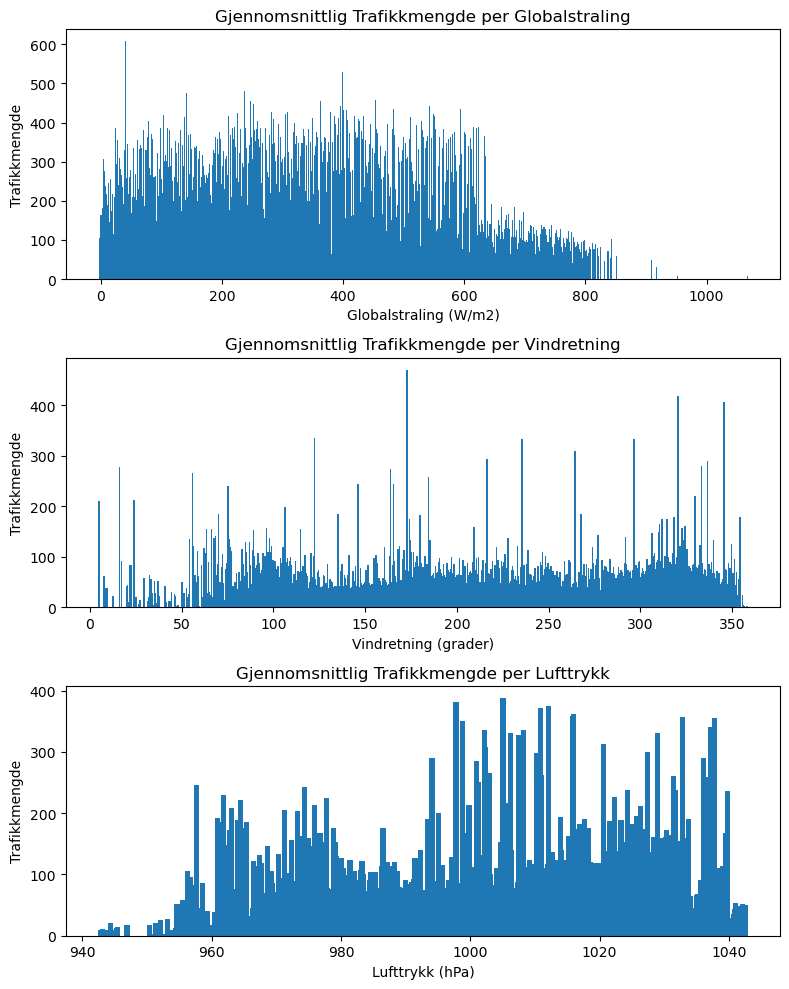

In [31]:
fig, axs = plt.subplots(3, 1, figsize= (8,10))

grouped_globalstraling = data.groupby('Globalstraling')['Trafikkmengde'].mean().reset_index()
grouped_vindretning = data.groupby('Vindretning')['Trafikkmengde'].mean().reset_index()
grouped_lufttrykk = data.groupby('Lufttrykk')['Trafikkmengde'].mean().reset_index()

axs[0].bar(grouped_globalstraling['Globalstraling'], grouped_globalstraling['Trafikkmengde'])
axs[0].set_title('Gjennomsnittlig Trafikkmengde per Globalstraling')
axs[0].set_ylabel('Trafikkmengde')
axs[0].set_xlabel('Globalstraling (W/m2)')

axs[1].bar(grouped_vindretning['Vindretning'], grouped_vindretning['Trafikkmengde'])
axs[1].set_title('Gjennomsnittlig Trafikkmengde per Vindretning')
axs[1].set_ylabel('Trafikkmengde')
axs[1].set_xlabel('Vindretning (grader)')

axs[2].bar(grouped_lufttrykk['Lufttrykk'], grouped_lufttrykk['Trafikkmengde'])
axs[2].set_title('Gjennomsnittlig Trafikkmengde per Lufttrykk')
axs[2].set_ylabel('Trafikkmengde')
axs[2].set_xlabel('Lufttrykk (hPa)')


plt.tight_layout()
plt.show()

Ut ifra grafene velger jeg å fjerne kolonnene `Gobalstraling` og `Vindretning`.

In [32]:
merged_data.drop(['Globalstraling'], axis=1, inplace=True)
merged_data

,Datetime,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast,Trafikkmengde
4720,2015-07-16 16:00:00,48.7,13.733333,317.500000,4.333333,1014.400000,7.200000,101
4721,2015-07-16 17:00:00,60.0,13.866667,318.166667,3.933333,1014.066667,6.550000,79
4722,2015-07-16 18:00:00,60.0,13.216667,319.833333,4.233333,1013.966667,7.150000,56
4723,2015-07-16 19:00:00,60.0,12.683333,323.500000,2.950000,1014.100000,5.450000,45
4724,2015-07-16 20:00:00,36.0,12.066667,333.500000,2.483333,1014.200000,4.250000,41
...,...,...,...,...,...,...,...,...
70108,2022-12-30 20:00:00,0.0,5.550000,138.666667,9.166667,966.916667,16.250000,1
70109,2022-12-30 21:00:00,0.0,5.683333,148.000000,7.283333,966.516667,13.383333,1
70110,2022-12-30 22:00:00,0.0,7.033333,139.500000,6.350000,966.883333,11.633333,4
70111,2022-12-30 23:00:00,0.0,7.616667,143.333333,5.740000,967.183333,10.250000,1


Lager en ny kolonne for å vite hvilken årstid raden hører til. 

In [33]:
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 2
    elif 6 <= month <= 8:
        return 3
    elif 9 <= month <= 11:
        return 4
    else:
        return 1

data['Årstid'] = data['Datetime'].apply(lambda x: get_season(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')))

data_winter = data[data['Årstid'] == 1]
data_spring = data[data['Årstid'] == 2]
data_summer = data[data['Årstid'] == 3]
data_autumn = data[data['Årstid'] == 4]

Visualisering av forholdene mellom `Solskinstid` og `Trafikkmengde`. 

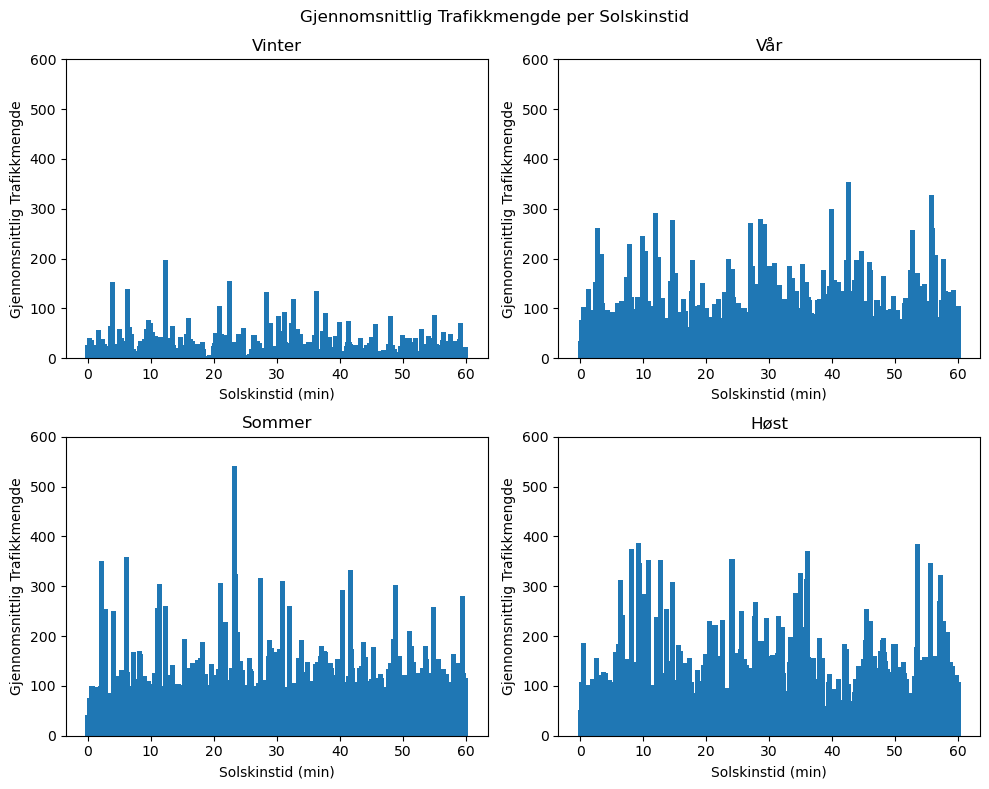

In [34]:
fig, axs = plt.subplots(2, 2, figsize= (10,8))
fig.suptitle('Gjennomsnittlig Trafikkmengde per Solskinstid')

grouped_winter = data_winter.groupby('Solskinstid')['Trafikkmengde'].mean().reset_index()
grouped_spring = data_spring.groupby('Solskinstid')['Trafikkmengde'].mean().reset_index()
grouped_summer = data_summer.groupby('Solskinstid')['Trafikkmengde'].mean().reset_index()
grouped_autumn = data_autumn.groupby('Solskinstid')['Trafikkmengde'].mean().reset_index()

axs[0, 0].bar(grouped_winter['Solskinstid'], grouped_winter['Trafikkmengde'])
axs[0, 0].set_title('Vinter')
axs[0, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 0].set_xlabel('Solskinstid (min)')
axs[0, 0].set_ylim(0, 600)

axs[0, 1].bar(grouped_spring['Solskinstid'], grouped_spring['Trafikkmengde'])
axs[0, 1].set_title('Vår')
axs[0, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 1].set_xlabel('Solskinstid (min)')
axs[0, 1].set_ylim(0, 600)

axs[1, 0].bar(grouped_summer['Solskinstid'], grouped_summer['Trafikkmengde'])
axs[1, 0].set_title('Sommer')
axs[1, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 0].set_xlabel('Solskinstid (min)')
axs[1, 0].set_ylim(0, 600)

axs[1, 1].bar(grouped_autumn['Solskinstid'], grouped_autumn['Trafikkmengde'])
axs[1, 1].set_title('Høst')
axs[1, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 1].set_xlabel('Solskinstid (min)')
axs[1, 1].set_ylim(0, 600)

plt.tight_layout()
plt.show()

Visualisering av forholdene mellom `Lufttemperatur` og `Trafikkmengde`

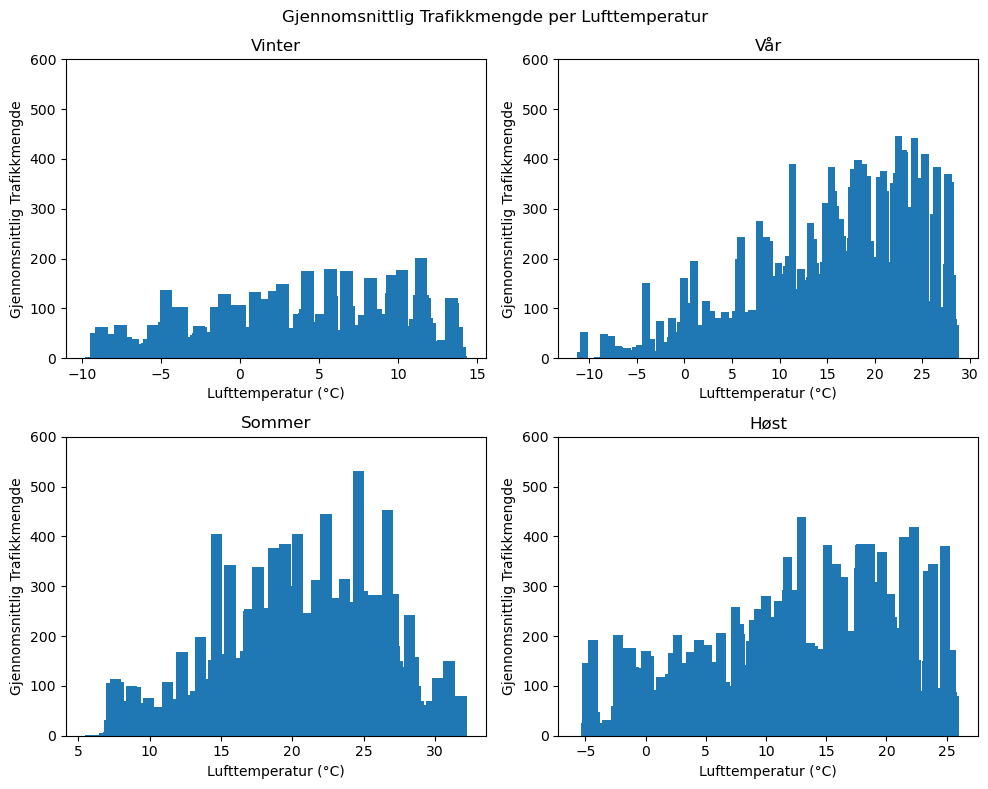

In [35]:
fig, axs = plt.subplots(2, 2, figsize= (10,8))
fig.suptitle('Gjennomsnittlig Trafikkmengde per Lufttemperatur')

grouped_winter = data_winter.groupby('Lufttemperatur')['Trafikkmengde'].mean().reset_index()
grouped_spring = data_spring.groupby('Lufttemperatur')['Trafikkmengde'].mean().reset_index()
grouped_summer = data_summer.groupby('Lufttemperatur')['Trafikkmengde'].mean().reset_index()
grouped_autumn = data_autumn.groupby('Lufttemperatur')['Trafikkmengde'].mean().reset_index()

axs[0, 0].bar(grouped_winter['Lufttemperatur'], grouped_winter['Trafikkmengde'])
axs[0, 0].set_title('Vinter')
axs[0, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 0].set_xlabel('Lufttemperatur (°C)')
axs[0, 0].set_ylim(0, 600)

axs[0, 1].bar(grouped_spring['Lufttemperatur'], grouped_spring['Trafikkmengde'])
axs[0, 1].set_title('Vår')
axs[0, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 1].set_xlabel('Lufttemperatur (°C)')
axs[0, 1].set_ylim(0, 600)

axs[1, 0].bar(grouped_summer['Lufttemperatur'], grouped_summer['Trafikkmengde'])
axs[1, 0].set_title('Sommer')
axs[1, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 0].set_xlabel('Lufttemperatur (°C)')
axs[1, 0].set_ylim(0, 600)

axs[1, 1].bar(grouped_autumn['Lufttemperatur'], grouped_autumn['Trafikkmengde'])
axs[1, 1].set_title('Høst')
axs[1, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 1].set_xlabel('Lufttemperatur (°C)')
axs[1, 1].set_ylim(0, 600)

plt.tight_layout()
plt.show()

Visualisering av forholdene mellom `Vindstyrke` og `Trafikkmengde`

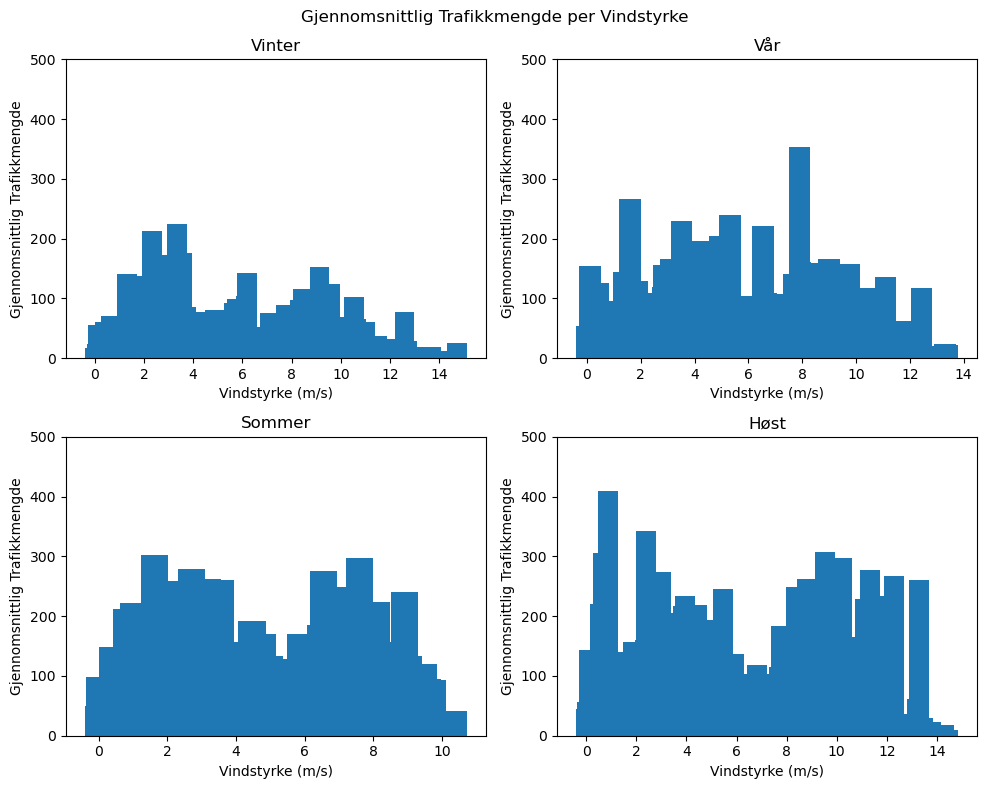

In [36]:
fig, axs = plt.subplots(2, 2, figsize= (10,8))
fig.suptitle('Gjennomsnittlig Trafikkmengde per Vindstyrke')

grouped_winter = data_winter.groupby('Vindstyrke')['Trafikkmengde'].mean().reset_index()
grouped_spring = data_spring.groupby('Vindstyrke')['Trafikkmengde'].mean().reset_index()
grouped_summer = data_summer.groupby('Vindstyrke')['Trafikkmengde'].mean().reset_index()
grouped_autumn = data_autumn.groupby('Vindstyrke')['Trafikkmengde'].mean().reset_index()

axs[0, 0].bar(grouped_winter['Vindstyrke'], grouped_winter['Trafikkmengde'])
axs[0, 0].set_title('Vinter')
axs[0, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 0].set_xlabel('Vindstyrke (m/s)')
axs[0, 0].set_ylim(0, 500)

axs[0, 1].bar(grouped_spring['Vindstyrke'], grouped_spring['Trafikkmengde'])
axs[0, 1].set_title('Vår')
axs[0, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 1].set_xlabel('Vindstyrke (m/s)')
axs[0, 1].set_ylim(0, 500)

axs[1, 0].bar(grouped_summer['Vindstyrke'], grouped_summer['Trafikkmengde'])
axs[1, 0].set_title('Sommer')
axs[1, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 0].set_xlabel('Vindstyrke (m/s)')
axs[1, 0].set_ylim(0, 500)

axs[1, 1].bar(grouped_autumn['Vindstyrke'], grouped_autumn['Trafikkmengde'])
axs[1, 1].set_title('Høst')
axs[1, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 1].set_xlabel('Vindstyrke (m/s)')
axs[1, 1].set_ylim(0, 500)

plt.tight_layout()
plt.show()

Visualisering av forholdene mellom `Vindkast` og `Trafikkmengde`

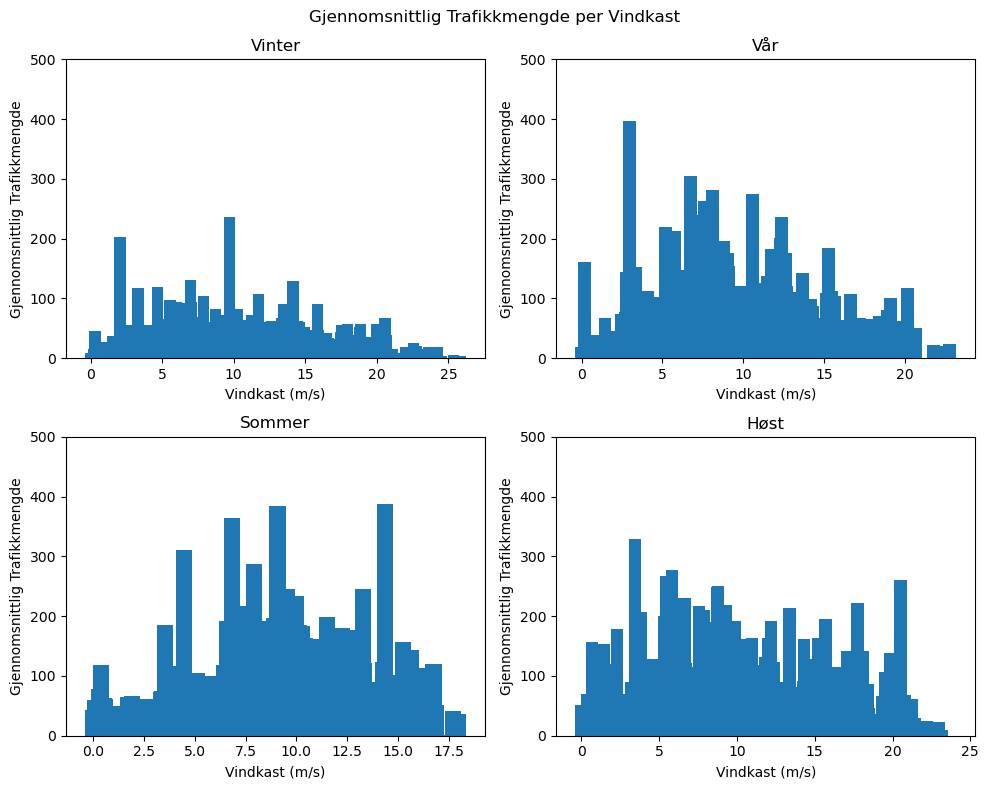

In [37]:
fig, axs = plt.subplots(2, 2, figsize= (10,8))
fig.suptitle('Gjennomsnittlig Trafikkmengde per Vindkast')

grouped_winter = data_winter.groupby('Vindkast')['Trafikkmengde'].mean().reset_index()
grouped_spring = data_spring.groupby('Vindkast')['Trafikkmengde'].mean().reset_index()
grouped_summer = data_summer.groupby('Vindkast')['Trafikkmengde'].mean().reset_index()
grouped_autumn = data_autumn.groupby('Vindkast')['Trafikkmengde'].mean().reset_index()

axs[0, 0].bar(grouped_winter['Vindkast'], grouped_winter['Trafikkmengde'])
axs[0, 0].set_title('Vinter')
axs[0, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 0].set_xlabel('Vindkast (m/s)')
axs[0, 0].set_ylim(0, 500)

axs[0, 1].bar(grouped_spring['Vindkast'], grouped_spring['Trafikkmengde'])
axs[0, 1].set_title('Vår')
axs[0, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[0, 1].set_xlabel('Vindkast (m/s)')
axs[0, 1].set_ylim(0, 500)

axs[1, 0].bar(grouped_summer['Vindkast'], grouped_summer['Trafikkmengde'])
axs[1, 0].set_title('Sommer')
axs[1, 0].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 0].set_xlabel('Vindkast (m/s)')
axs[1, 0].set_ylim(0, 500)

axs[1, 1].bar(grouped_autumn['Vindkast'], grouped_autumn['Trafikkmengde'])
axs[1, 1].set_title('Høst')
axs[1, 1].set_ylabel('Gjennomsnittlig Trafikkmengde')
axs[1, 1].set_xlabel('Vindkast (m/s)')
axs[1, 1].set_ylim(0, 500)

plt.tight_layout()
plt.show()

## Datamodellering

In [38]:
datasett = merged_data.copy()

X = datasett.drop(columns=['Trafikkmengde']).values # Features
y = datasett['Trafikkmengde'].values # Target variable

# Splitter datasettet til treningsett, valideringssett og testsett
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Prediksjon

In [39]:
data = {'Dato': [], 'Tid': [], 'Prediksjon': []}

df = pd.DataFrame(data)

df.to_csv('predictions.csv', index=False)